# Import Library

In [46]:
import pandas as pd
# from google.colab import drive
# drive.mount("/content/drive/")

import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette("Set2")
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Loading

In [ ]:
# movies = pd.read_csv("/content/drive/MyDrive/movies-dataset/movies.csv")
# ratings = pd.read_csv("/content/drive/MyDrive/movies-dataset/ratings.csv")

In [3]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

# EDA

## Menganalisis Rincian Dataset

Melihat rincian dari dataset movies

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


**Insight**
- Terdapat 3 kolom pada dataset yang terdiri dari:
  - `movieId` : identitas dari film yang memiliki tipe data int64 (numerikal)
  - `title` : judul dari film yang memiliki tipe data object (kategorikal)
  - `genres` : genre dari film yang memiliki tipe data object (kategorikal)
- Semua kolom pada data memiliki jumlah baris yang sama yaitu 9742 baris data.

Melihat rincian dari dataset movies

In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


**Insight**
- Terdapat 4 kolom pada dataset yang terdiri dari:
  - `userId` : identitas dari pengguna yang memiliki tipe data int64 (numerikal)
  - `movieId` : identitas dari film yang memiliki tipe data int64 (numerikal)
  - `rating` : rating atau penilaian pengguna terhadap film yang memiliki tipe data float64 (numerikal)
  - `timestamp` : waktu pengguna memberi rating pada film yang memiliki tipe data int64 (numerikal)
- Semua kolom pada data memiliki jumlah baris yang sama yaitu 100836 baris data.

## Melihat Ringkasan Data

Melihat dataset movies

In [13]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Insight**
- Kolom movie id berisi data numerik increment berurutan dari angka 1
- Kolom title berisi judul dari film beserta tahun rilisnya
- Kolom genres berisi beberapa genre yang dipisahkan oleh karakter '|' dari film tersebut.
- Data pada kolom genres perlu dibersihkan untuk mengambil genre utamanya saja

Melihat dataset ratings

In [14]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Insight**
- Data berurutan dimulai dari user id 1
- Kolom rating berisi rating pengguna yang memiliki tipe data float kemungkinan terdapat rating dengan nilai pecahan atau koma
  

## Memeriksa Missing Values dan Data Duplikat

Memeriksa dataset movies

In [ ]:
null_val = movies.isna().sum()
duplicated_data = movies.duplicated().sum()
print("===============================")
print(f"Jumlah Missing Values: \n{null_val}")
print(f"Jumlah Data Duplikat: {duplicated_data}")
print("===============================")

Jumlah Missing Values: 
movieId    0
title      0
genres     0
dtype: int64
Jumlah Data Duplikat: 0


Memeriksa dataset ratings

In [ ]:
null_val = ratings.isna().sum()
duplicated_data = ratings.duplicated().sum()
print("===============================")
print(f"Jumlah Missing Values: \n{null_val}")
print(f"Jumlah Data Duplikat: {duplicated_data}")
print("===============================")

Jumlah Missing Values: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Jumlah Data Duplikat: 0


**Insight**
- Tidak ada nilai yang hilang atau missing values pada dataset movies dan ratings
- Tidak ada data yang duplikat pada dataset movies dan ratings

## Analisis Distribusi Data

Membersihkan data genres dengan mengambil genre utamanya saja

In [5]:
movies['genres'] = movies['genres'].str.split('|').str[0]
movies['genres'].value_counts()

genres
Comedy                2779
Drama                 2226
Action                1828
Adventure              653
Crime                  537
Horror                 468
Documentary            386
Animation              298
Children               197
Thriller                84
Sci-Fi                  62
Mystery                 48
Fantasy                 42
Romance                 38
(no genres listed)      34
Western                 23
Musical                 23
Film-Noir               12
War                      4
Name: count, dtype: int64

Membuat fungsi untuk menampilkan distribusi setiap data

In [30]:
def cekDistribusi(dataframe, kolom):
    df = dataframe.copy()
    fitur = df[kolom].value_counts().sort_values(ascending=False).index
    total = len(df)

    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=kolom, order=fitur, palette=palette)

    # Menambahkan nilai aktual dan persentase di atas setiap bar
    for p in ax.patches:
        nilai = int(p.get_height())
        # persentase = 100 * nilai / total
        ax.annotate(f'{nilai}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

    plt.title(f'Distribusi Kolom {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Menampilkan distribusi data genres pada dataset movies

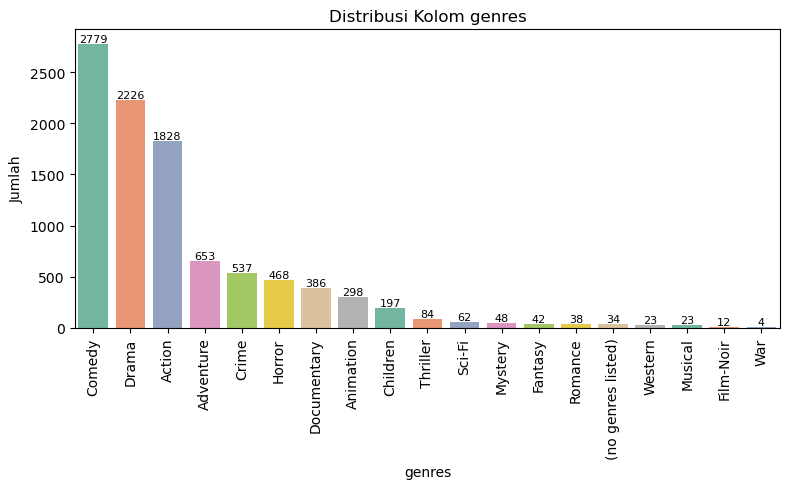

In [31]:
cekDistribusi(movies, 'genres')

Menampilkan distribusi data rating pada dataset ratings

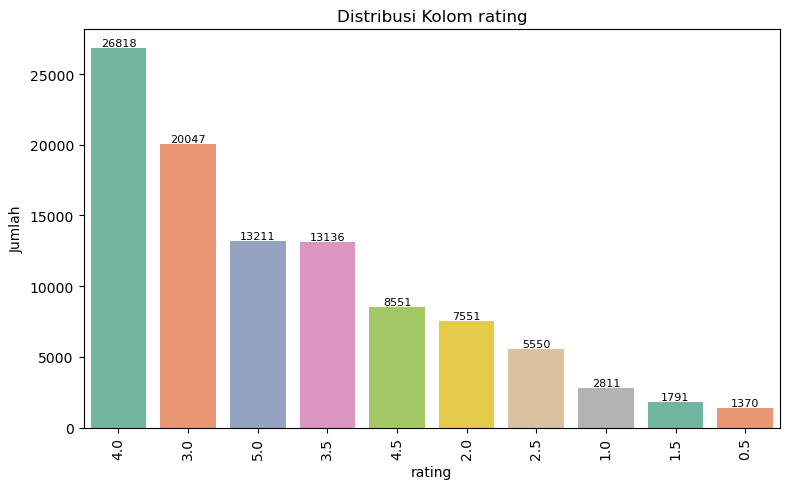

In [32]:
cekDistribusi(ratings, 'rating')

# Data Preparation

## Data Cleaning

Menangani Missing Values dan Duplicated Data pada Dataset Movies

In [53]:
clean_movies = movies.dropna().drop_duplicates()
clean_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Menangani Missing Values dan Duplicated Data pada Dataset Ratings

In [39]:
clean_ratings = ratings.dropna().drop_duplicates()
clean_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


## Pemilihan Fitur

### Dataset Movies

Menghapus nilai **(no_genres_listed)** pada kolom genres

In [54]:
clean_movies = clean_movies[clean_movies['genres'] != '(no genres listed)'] 
clean_movies['genres'].unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Animation', 'Documentary', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Film-Noir', 'Romance', 'Sci-Fi', 'Musical',
       'War'], dtype=object)

### Dataset Ratings

Menghapus fitur atau kolom `timestamp` karena fitur tersebut tidak relevan untuk melakukan pemodelan

In [44]:
clean_ratings = clean_ratings.drop(columns=['timestamp'], axis=1)
clean_ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


## Text Cleaning

In [58]:
clean_movies['genres'].unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Animation', 'Documentary', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Filmnoir', 'Romance', 'Sci-Fi', 'Musical',
       'War'], dtype=object)

In [60]:
clean_movies['genres'] = clean_movies['genres'].replace({'Sci-Fi':'SciFi', 'Film-Noir':'Filmnoir'})
print(clean_movies[clean_movies['genres'] == 'SciFi'].head())
print(clean_movies[clean_movies['genres'] == 'Filmnoir'].head())

      movieId                                  title genres
668       880       Island of Dr. Moreau, The (1996)  SciFi
1320     1779                          Sphere (1998)  SciFi
1719     2311  2010: The Year We Make Contact (1984)  SciFi
1902     2526                          Meteor (1979)  SciFi
2000     2661        It Came from Outer Space (1953)  SciFi
      movieId                       title    genres
279       320               Suture (1993)  Filmnoir
695       913  Maltese Falcon, The (1941)  Filmnoir
711       930            Notorious (1946)  Filmnoir
913      1212       Third Man, The (1949)  Filmnoir
1531     2066      Out of the Past (1947)  Filmnoir


In [61]:
groupped_ratings = clean_ratings.groupby('movieId')
groupped_ratings

## Data Transformation

### TF-IDF Vectorizer

In [63]:
tfidf = TfidfVectorizer()

tfidf.fit(clean_movies['genres'])
tfidf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'filmnoir', 'horror', 'musical',
       'mystery', 'romance', 'scifi', 'thriller', 'war', 'western'],
      dtype=object)

In [84]:
genre_tfid_cbf = tfidf.fit_transform(clean_movies['genres']) 
genre_tfid_cbf.shape

(9708, 18)

In [86]:
genre_tfid_cbf.todense()

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Cosine Simmilarity

In [87]:
genre_cosin_cbf = cosine_similarity(genre_tfid_cbf)
genre_cosin_cbf

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [88]:
genre_cosin_df = pd.DataFrame(genre_cosin_cbf, index=clean_movies['title'], columns=clean_movies['title'])
genre_cosin_df.sample(5, axis=1).sample(5, axis=0)

title,Friday After Next (2002),Death Sentence (2007),Of Mice and Men (1939),Paul Blart: Mall Cop 2 (2015),Mortadelo & Filemon: The Big Adventure (La gran aventura de Mortadelo y Filemón) (2003)
title,,,,,
Pacific Rim (2013),0.0,0.0,0.0,1.0,1.0
Croupier (1998),0.0,0.0,0.0,0.0,0.0
The Martian (2015),0.0,0.0,0.0,0.0,0.0
Twisted (2004),0.0,0.0,0.0,0.0,0.0
Vantage Point (2008),0.0,0.0,0.0,1.0,1.0
